In [1]:
import os
from pandas import *
from numpy import *
from H_utility import *

currentdir='/home/adun6414/Work/CERC_UCM'
os.chdir(currentdir)
os.chdir('/home/adun6414/Work/CERC_UCM/Fig_n_data')
filename='DATA8to8.csv' #filename='DATA8to9.csv'
DATA=read_csv(filename).set_index('Date')
DATA.index=H_num2date(H_date2num(DATA.index))

Text(0, 0.5, 'range temp [$^oF$]')

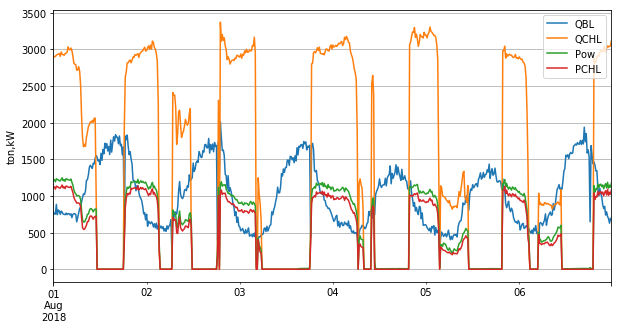

<Figure size 720x360 with 0 Axes>

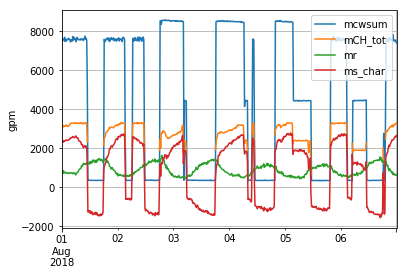

<Figure size 720x360 with 0 Axes>

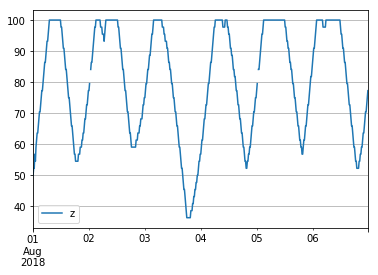

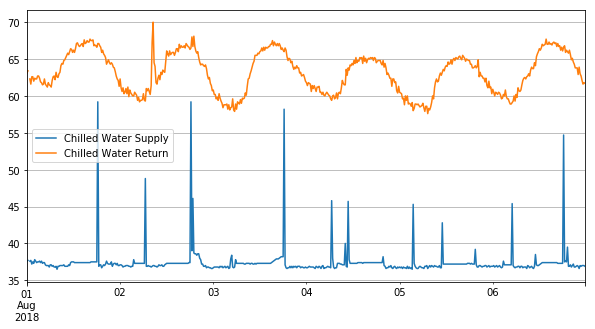

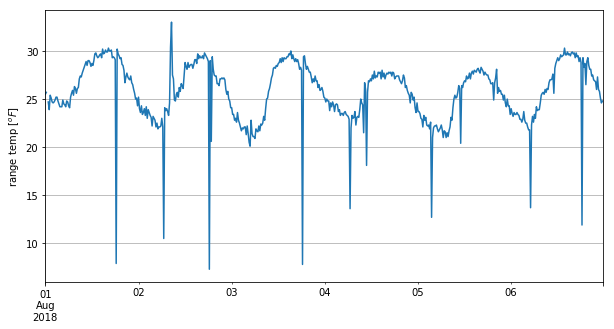

In [32]:
QBL=DATA['QBL'].fillna(method='ffill')
QCHL=DATA['QCHLsum'].fillna(value=0)
Twb=DATA['Twb'].fillna(method='ffill')
PCHL=DATA[['PCHsum']]
PCT=DATA[['PCTtot']]
Pow=DATA[['PCHsum','PCTtot']].sum(axis=1)
TCHWS=DATA['Chilled Water Supply'].apply(f2c)
TCHWR=DATA['Chilled Water Return'].apply(f2c)

figure(figsize=(10,5))
ax=subplot(111)
QBL.apply(kW2ton).plot(grid=True ,ax=ax)
QCHL.apply(kW2ton).plot(grid=True ,ax=ax)
Pow.plot(grid=True,ax=ax)
PCHL.plot(grid=True,ax=ax)
legend(['QBL','QCHL','Pow','PCHL'])
ylabel('ton,kW')

figure(figsize=(10,5))
DATA[['mcwsum','mCH_tot','mr','ms_char']].apply(kgs2gpm).plot(grid=True)
ylabel('gpm')

figure(figsize=(10,5))
DATA[['z']].plot(grid=True)

figure(figsize=(10,5))
ax=axes()
DATA[['Chilled Water Supply','Chilled Water Return']].plot(grid=True,ax=ax)

figure(figsize=(10,5))
ax=axes()
DT=TCHWR.apply(c2f)-TCHWS.apply(c2f)
DT.plot(grid=True,ax=ax)
ylabel('range temp [$^oF$]')


capacity ton-hr: 23449.035496466753
TT-13 Temp TT-56 Temp 44


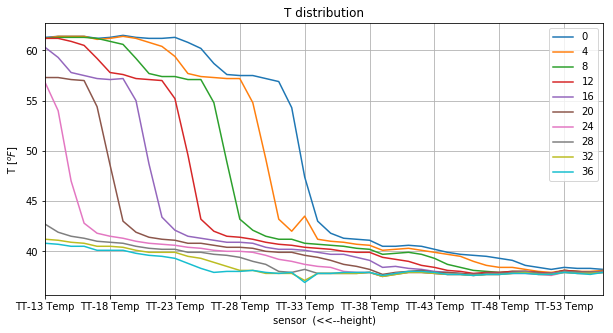

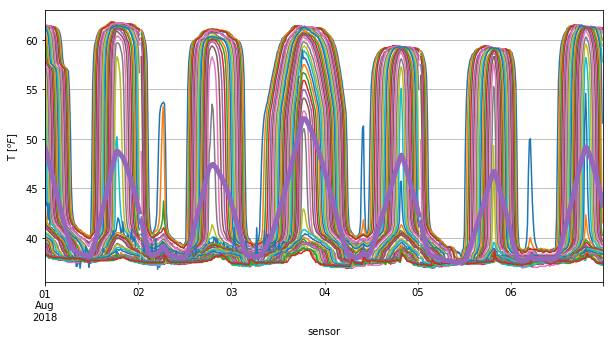

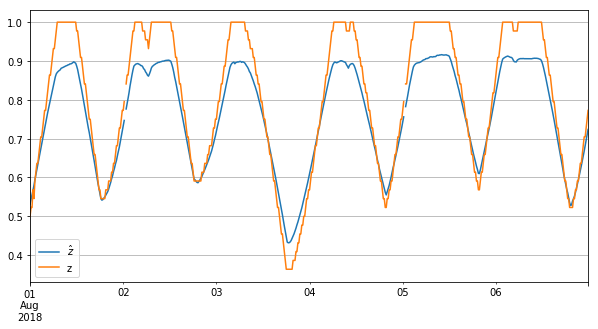

In [28]:
R=10; # inconsistency between report (2M gallon) and modelica model (D=20)
H=15;
A=pi*R**2;
V=A*H
C=kJ2tonhr(1E3*V*4.2*(f2c(65)-f2c(38)))# kJ
print('capacity ton-hr:',C)

Tindex=[k for k in DATA.keys() if 'TT' in k]
print(Tindex[0], Tindex[-1], len(Tindex))
dV=V*1./len(Tindex)
TS=DATA[Tindex]#.loc['2018-08-01 00:00':'2018-08-01 12:00']

figure(figsize=(10,5))
for k  in arange(0,10)*int(len(Tindex)*1./10):
    TS.iloc[k,:].plot(grid=True,legend=[]);xlabel('sensor  (<<--height)');ylabel('T [$^oF$]');title('T distribution')
legend(arange(0,10)*int(len(Tindex)*1./10))
inxmaxdT=TS.diff(axis=1,periods=1).apply(abs).idxmax(axis=1) # find index which gives maximum

figure(figsize=(10,5))
ax=subplot(111)
TS.iloc[0:-1,:].plot(grid=True,legend=[],ax=ax);xlabel('sensor');ylabel('T [$^oF$]')
TS.mean(axis=1).plot(linewidth=5,ax=ax,grid=True)


z=(65-TS.mean(axis=1))/(65-35)
figure(figsize=(10,5))
z.plot()
(DATA['z']/100).plot(grid=True)
legend(['$\hat{z}$','z'])

Text(63.125, 0.5, 'State of Charge')

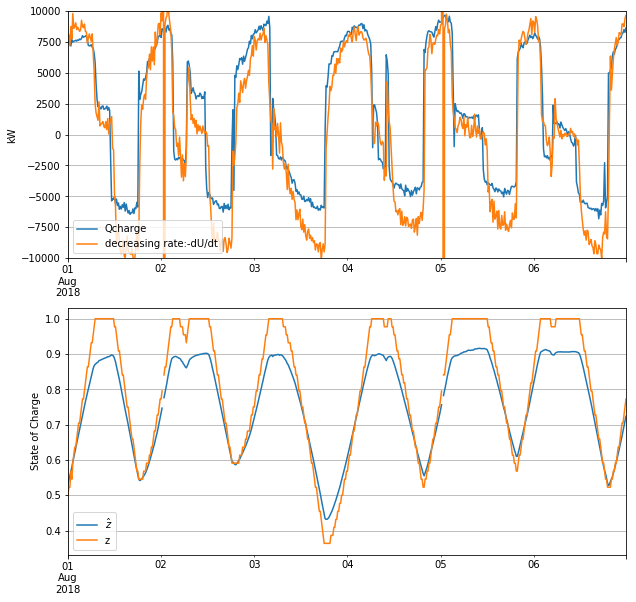

In [26]:
U=4.2*1e3*TS.sum(axis=1)*dV #U=int (Cv*rho*T)*dV = sum(T)*dV
dU=U.to_frame().diff() # kJ over 15 min
dUdt=dU/(15*60)
Qin=QCHL-QBL
figure(figsize=(10,10))
ax=subplot(211)
Qin.plot(grid=True,ax=ax)
(-1*dUdt).plot(grid=True,ax=ax)
ax.legend(['Qcharge','decreasing rate:-dU/dt'])
ylim([-1e4,1e4])
ylabel('kW')
ax=subplot(212)
z.plot(ax=ax)
(DATA['z']/100).plot(ax=ax,grid=True)
legend(['$\hat{z}$','z'])
savefig('inefficiency.png')
ylabel('State of Charge')